Après l'ETL et l'obtention d'un donnée utilisable, on va essayer de faire un AED sur ces données

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Lire le fichier
data = pd.read_csv("./dags/final_dataframe.csv")

In [16]:
# Verifier les données
data.head()

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
0,0,The Verge,Umar Shakir,Tesla is starting to offer one-time Full Self-...,Tesla is offering current vehicle owners who h...,https://www.theverge.com/2023/7/21/23802957/te...,https://cdn.vox-cdn.com/thumbor/j3VQOpsQ_f4a8d...,2023-07-21T19:53:04Z,Tesla is starting to offer one-time Full Self-...
1,1,The Verge,Umar Shakir,Tesla’s Cybertruck is less than 19 feet long s...,"Tesla’s Cybertruck is a sub-19-foot pickup, an...",https://www.theverge.com/2023/7/19/23799319/te...,https://cdn.vox-cdn.com/thumbor/W68jHXcwqIoOGW...,2023-07-19T22:32:08Z,Teslas Cybertruck is less than 19 feet long so...
2,2,The Verge,Jon Porter,Tesla’s Cybertruck didn’t always look so cyber...,Elon Musk biographer Walter Isaacson has share...,https://www.theverge.com/2023/7/20/23801421/te...,https://cdn.vox-cdn.com/thumbor/dL8tPnIIcGu_ZG...,2023-07-20T11:07:53Z,The photo shared by Isaacson showing concept i...
3,3,The Verge,Andrew J. Hawkins,GM says all of its EVs will be able to power y...,GM says all of its electric vehicles will have...,https://www.theverge.com/2023/8/8/23823166/gm-...,https://cdn.vox-cdn.com/thumbor/_yGSC92PmZR3V0...,2023-08-08T13:00:00Z,GM says all of its EVs will be able to power y...
4,4,The Verge,Roberto Baldwin,Why charge an EV when you can just swap its ba...,EV battery swapping could help solve the probl...,https://www.theverge.com/23809811/ev-battery-s...,https://cdn.vox-cdn.com/thumbor/3HaZdLu2R0VT2O...,2023-07-27T15:51:43Z,Ample says it can swap an EV battery in just f...


In [17]:
print("Nombre d'auteur: ", data['author'].nunique())

Nombre d'auteur:  26


In [18]:
# Grouper les articels par auteur
groupedByAuthor = data.groupby('author').size().reset_index(name='article_count')

In [27]:
descGrouped = groupedByAuthor.sort_values(by='article_count', ascending=False)

In [54]:
descGrouped

,author,article_count
3,Andrew J. Hawkins,15
23,Unknown,10
22,Umar Shakir,8
17,Rebecca Bellan,7
12,Kirsten Korosec,7
18,Rita Liao,5
2,Amanda Silberling,4
25,https://www.facebook.com/bbcnews,3
24,Wes Davis,3
8,Harri Weber,3


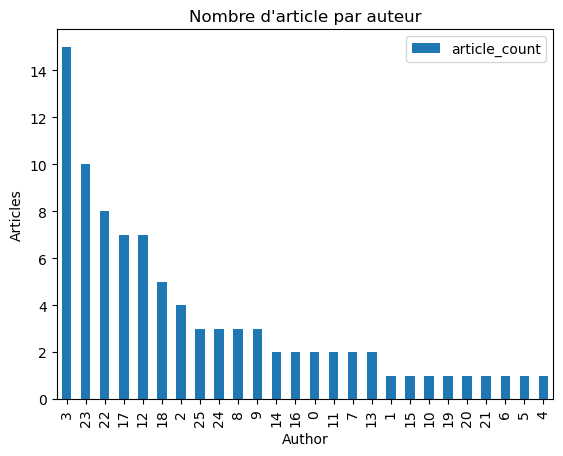

In [56]:
descGrouped.plot(kind='bar')
plt.ylabel('Articles')
plt.xlabel('Author')
plt.title("Nombre d'article par auteur")
plt.show()

In [57]:
# Calculer le pourcentage d'articles d'auteurs connus et inconnus
total_articles = groupedByAuthor['article_count'].sum()
known_authors = total_articles - groupedByAuthor[groupedByAuthor['author'] == 'Unknown']['article_count']
unknown_authors = groupedByAuthor[groupedByAuthor['author'] == 'Unknown']['article_count']

percentage_known_authors = (known_authors / total_articles) * 100
percentage_unknown_authors = (unknown_authors / total_articles) * 100

print("Pourcentage d'auteurs connus :", percentage_known_authors.values[0])
print("Pourcentage d'auteurs inconnus :", percentage_unknown_authors.values[0])

Pourcentage d'auteurs connus : 88.76404494382022
Pourcentage d'auteurs inconnus : 11.235955056179774


In [67]:
# Trouver l'auteur le plus populaire
most_popular_author = descGrouped.loc[descGrouped['article_count'].idxmax(), 'author']
print("Auteur le plus populaire :", most_popular_author)


Auteur le plus populaire : Andrew J. Hawkins


In [68]:
# Trouver la source la plus populaire
most_popular_source = data['source'].value_counts().idxmax()
print("Source la plus populaire :", most_popular_source)

Source la plus populaire : TechCrunch


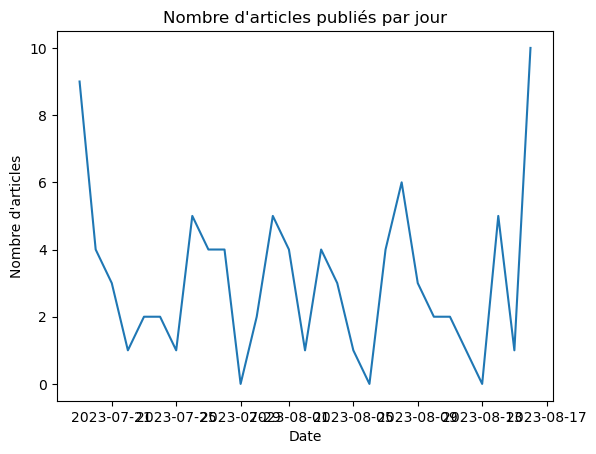

In [70]:
# Effectuer une analyse de série chronologique sur les données temporelles
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data.set_index('publishedAt', inplace=True)
daily_article_counts = data.resample('D').size()
plt.plot(daily_article_counts)
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles publiés par jour')
plt.show()

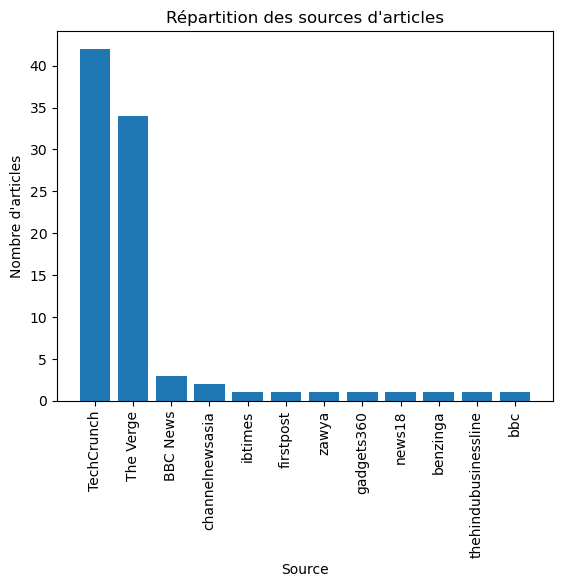

In [71]:
# Visualiser la répartition des sources d'articles
source_counts = data['source'].value_counts()
plt.bar(source_counts.index, source_counts.values)
plt.xlabel('Source')
plt.ylabel('Nombre d\'articles')
plt.title('Répartition des sources d\'articles')
plt.xticks(rotation=90)
plt.show()